In [1]:
#import and process Dow Jon Futures history 
import pandas as pd
from pprint import pprint

pf = pd.read_json("historyIndex.json")
#add one more label column in the each row (Last day)
futuresData = pd.DataFrame(columns=pf['dataset']['column_names'], data = pf['dataset']['data'])
futuresData = futuresData.iloc[::-1]
futuresData.index = range(len(futuresData))
y = futuresData.loc[1:2630, ['Last']]
y.index = range(len(y))
y.columns = ['Next Day Last']
futuresData = pd.merge(futuresData, y, left_index=True, right_index=True)
futuresData.drop(['Change'], axis = 1, inplace = True, errors = 'ignore')

In [2]:
#import and process the sentiment of the reddit sumissions title
sentimentData = pd.read_csv("mean_sentiment14_date.csv")
sentimentData.columns=['Date','neg','neu','pos','compound']

In [3]:
#merge imported data
dataset = sentimentData.merge(futuresData, on='Date', how='left')

dataset = dataset.dropna(how='any')  #TODO
dataset.index = range(len(dataset))
dataset = dataset.drop(["Last"],axis=1) #TODO


dataset = dataset.drop(["neg"], axis=1)
dataset = dataset.drop(["neu"], axis=1)
dataset = dataset.drop(["pos"], axis=1)
dataset = dataset.drop(["compound"], axis=1)

dataset

,Date,Open,High,Low,Settle,Volume,Previous Day Open Interest,Next Day Last
0,2012-11-13,12777.0,12855.0,12684.0,12717.00,138310.0,101101.0,12544.00
1,2012-11-14,12731.0,12803.0,12509.0,12544.00,167420.0,101005.0,12522.00
2,2012-11-15,12545.0,12581.0,12464.0,12522.00,152927.0,101319.0,12570.00
3,2012-11-16,12520.0,12573.0,12434.0,12570.00,167779.0,100484.0,12738.00
4,2012-11-19,12579.0,12764.0,12573.0,12738.00,126099.0,94345.0,12759.00
5,2012-11-20,12733.0,12777.0,12666.0,12759.00,122895.0,95051.0,12800.00
6,2012-11-21,12757.0,12813.0,12696.0,12800.00,82562.0,95921.0,12961.00
7,2012-11-23,12802.0,12982.0,12801.0,12961.00,61917.0,96069.0,12936.00
8,2012-11-26,12949.0,12951.0,12870.0,12936.00,90154.0,94842.0,12862.00
9,2012-11-27,12940.0,12971.0,12845.0,12862.00,125648.0,95474.0,12957.00


In [4]:
import numpy as np
import tensorflow as tf

#define constant variable, hidden layer units and learn rate
rnnUnit = 10      
inputSize = 6      
outputSize = 1
learningRate = 0.0006    

#training data
data = dataset.iloc[:,1:8].values
print(data)

[[ 12777.  12855.  12684. ... 138310. 101101.  12544.]
 [ 12731.  12803.  12509. ... 167420. 101005.  12522.]
 [ 12545.  12581.  12464. ... 152927. 101319.  12570.]
 ...
 [ 24097.  24147.  23306. ... 355871.  98611.  23981.]
 [ 23609.  24010.  23545. ... 354073. 101366.  24243.]
 [ 23981.  24282.  23361. ... 381535.  96215.  24480.]]


In [5]:
#get training dataset
def getTrainingData( batchSize, timeStep, trainBegin, trainEnd, data):
    batch_index = []
    data_train = data[trainBegin:trainEnd]
    mean = np.mean(data_train, axis=0)
    std = np.std(data_train, axis=0)
    
    # Stardardization
    normalized_train_data = (data_train-mean)/std  
    train_x,train_y = [],[]   
    for i in range(len(normalized_train_data)-timeStep):
       if i % batchSize == 0:
           batch_index.append(i)
       x=normalized_train_data[i:i+timeStep, :inputSize]
       y=normalized_train_data[i:i+timeStep, inputSize, np.newaxis]
       train_x.append(x.tolist())
       train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data)-timeStep))
    return batch_index, train_x, train_y

In [6]:
#get test dataset
def getTestData( timeStep, testBegin, trainEnd, data):
    data_test = data[testBegin:trainEnd]
    mean = np.mean(data_test, axis=0)
    std = np.std(data_test,axis=0)
    
    # Stardardization
    normalized_test_data=(data_test-mean)/std  
    size=(len(normalized_test_data)+timeStep-1)//timeStep  #有size个sample
        
    test_x,test_y=[],[]
    for i in range(size-1): 
       x=normalized_test_data[i*timeStep:(i+1)*timeStep, :inputSize]
       y=normalized_test_data[i*timeStep:(i+1)*timeStep, inputSize]
       test_x.append(x.tolist())
       test_y.extend(y)
    
        
    test_x.append((normalized_test_data[(i+1)*timeStep:, :inputSize]).tolist())
    test_y.extend((normalized_test_data[(i+1)*timeStep:, inputSize]).tolist())
     
    return mean, std, test_x, test_y

In [7]:
weights={
        'in':tf.Variable(tf.random_normal([inputSize,rnnUnit])),
        'out':tf.Variable(tf.random_normal([rnnUnit,1]))
}
biases={
        'in':tf.Variable(tf.constant(0.1,shape=[rnnUnit,])),
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
}

#LSTM cell
def lstm(X):   
    
    #define neural networks parameters
    #define input/ouput weight, bias
   
    batchSize = tf.shape(X)[0]
    timeStep = tf.shape(X)[1]
    w_in = weights['in']
    b_in = biases['in']
    input = tf.reshape(X,[-1, inputSize])  
    input_rnn = tf.matmul(input,w_in)+b_in
    input_rnn = tf.reshape(input_rnn,[-1, timeStep, rnnUnit])  
    cell = tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnnUnit, reuse = tf.get_variable_scope().reuse )
    init_state = cell.zero_state(batchSize, dtype=tf.float32)
    with tf.variable_scope("rnn3", reuse = None):
        output_rnn, final_states=tf.nn.dynamic_rnn(cell, input_rnn, initial_state=init_state, dtype=tf.float32)
    
    output = tf.reshape(output_rnn,[-1,rnnUnit]) 
    w_out = weights['out']
    b_out = biases['out']
    pred = tf.matmul(output,w_out)+b_out
    return pred, final_states

In [8]:
#train LSTM
def trainLSTM( batchSize, timeStep, trainBegin, trainEnd, data):
    
    X = tf.placeholder(tf.float32, shape=[None, timeStep, inputSize])
    Y = tf.placeholder(tf.float32, shape=[None, timeStep, outputSize])
    batch_index, train_x, train_y = getTrainingData( batchSize, timeStep, trainBegin, trainEnd, data)
    
    with tf.variable_scope("lstm3"):
        pred, _ = lstm(X)
        
    loss = tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
    train_op = tf.train.AdamOptimizer(learningRate).minimize(loss)
    saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #number of iteration
        for i in range(1000):     
            for step in range(len(batch_index)-1):
                _, loss_ = sess.run([train_op, loss], feed_dict={ X: train_x[batch_index[step]:batch_index[step+1]], Y: train_y[batch_index[step]:batch_index[step+1]]})
            print("Number of iterations:", i," loss:", loss_)
        print("Model saves: ", saver.save(sess, './model4.ckpt'))
        print("The training is finished")

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Model prediction
def prediction(timeStep, testBegin, trainEnd, data):
    X = tf.placeholder(tf.float32, shape=[None, timeStep, inputSize])
    mean, std, test_x, test_y = getTestData(timeStep, testBegin, trainEnd, data)
    
    #print(len(test_x))
    #print(test_x)
    #print(len(test_y))    
    
    with tf.variable_scope("lstm3", reuse=True):
        pred, _ = lstm(X)
           
    saver = tf.train.Saver(tf.global_variables())
    with tf.Session() as sess: 
        #read parameters
        module_file = tf.train.latest_checkpoint('./')
        saver.restore(sess, module_file)
        test_predict = []
        
        for step in range(len(test_x)-1):
          prob = sess.run( pred, feed_dict={X:[test_x[step]]} )
          #pprint([test_x[step]]) 
          predict=prob.reshape((-1))
          #pprint(predict)
          test_predict.extend(predict)
        
        test_y = np.array(test_y)*std[inputSize]+mean[inputSize]
        test_predict = np.array(test_predict)*std[inputSize]+mean[inputSize]
        
        

        PMSE = np.average(np.abs(test_predict[20:]-test_y[20:len(test_predict)])/test_y[20:len(test_predict)])  
        print("PMSE:", PMSE)
             
        RMSE = np.sqrt(((test_predict[20:]-test_y[20:len(test_predict)]) ** 2).mean())    
        print("RMSE:", RMSE)        
          
        plt.figure()
        xAxis = range(20, len(test_predict));
        plt.plot(xAxis, test_predict[20:], '-bo',)
        plt.plot(xAxis, test_y[20:len(test_predict)], '-ro')      
        plt.show()
        
    return test_predict

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Number of iterations: 0  loss: 5.511498
Number of iterations: 1  loss: 1.4735789
Number of iterations: 2  loss: 1.2008833
Number of iterations: 3  loss: 1.1154021
Number of iterations: 4  loss: 0.96199125
Number of iterations: 5  loss: 0.8464671
Number of iterations: 6  loss: 0.7517279
Number of iterations: 7  loss: 0.6695726
Number of iterations: 8  loss: 0.59792095
Number of iterations: 9  loss: 0.5344075
Number of iterations: 10  loss: 0.4777916
Number of iterations: 11  loss: 0.42708865
Number of iterations: 12  loss: 0.38163242
Number of iterations: 13  loss: 0.3408989
Number of iterations: 14  loss: 0.3044905
Number of iterations: 15  loss: 0.27206254
Number of iterations: 16  loss: 0.24331135
Number of iterations: 17  loss: 0.21794559
Number of iterations: 18  loss: 0.19569038
Number of iterations: 19  loss: 0.17627382
Number of iterations: 20  loss: 0.15943319
Number of iterations: 21  loss: 0.14490609
Number of iterations: 22  loss: 0.13243814
Number of iterations: 23  loss: 0

Number of iterations: 187  loss: 0.0104079805
Number of iterations: 188  loss: 0.0076143686
Number of iterations: 189  loss: 0.009990221
Number of iterations: 190  loss: 0.0075008087
Number of iterations: 191  loss: 0.010043162
Number of iterations: 192  loss: 0.0075498223
Number of iterations: 193  loss: 0.010706242
Number of iterations: 194  loss: 0.007913122
Number of iterations: 195  loss: 0.012579687
Number of iterations: 196  loss: 0.008962596
Number of iterations: 197  loss: 0.017459868
Number of iterations: 198  loss: 0.0114765335
Number of iterations: 199  loss: 0.030173402
Number of iterations: 200  loss: 0.016403282
Number of iterations: 201  loss: 0.056898963
Number of iterations: 202  loss: 0.021314235
Number of iterations: 203  loss: 0.079119466
Number of iterations: 204  loss: 0.018981058
Number of iterations: 205  loss: 0.06420298
Number of iterations: 206  loss: 0.013344779
Number of iterations: 207  loss: 0.038517542
Number of iterations: 208  loss: 0.010155356
Number

Number of iterations: 370  loss: 0.007900518
Number of iterations: 371  loss: 0.016148005
Number of iterations: 372  loss: 0.007811117
Number of iterations: 373  loss: 0.01579874
Number of iterations: 374  loss: 0.007722764
Number of iterations: 375  loss: 0.015460095
Number of iterations: 376  loss: 0.007648182
Number of iterations: 377  loss: 0.01518152
Number of iterations: 378  loss: 0.0075953472
Number of iterations: 379  loss: 0.01499423
Number of iterations: 380  loss: 0.0075678374
Number of iterations: 381  loss: 0.014910285
Number of iterations: 382  loss: 0.0075649954
Number of iterations: 383  loss: 0.01492496
Number of iterations: 384  loss: 0.0075823595
Number of iterations: 385  loss: 0.015019245
Number of iterations: 386  loss: 0.007612573
Number of iterations: 387  loss: 0.01516056
Number of iterations: 388  loss: 0.007645672
Number of iterations: 389  loss: 0.015308047
Number of iterations: 390  loss: 0.0076710437
Number of iterations: 391  loss: 0.015418558
Number of 

Number of iterations: 552  loss: 0.0066145346
Number of iterations: 553  loss: 0.011770609
Number of iterations: 554  loss: 0.006612701
Number of iterations: 555  loss: 0.011762257
Number of iterations: 556  loss: 0.006610388
Number of iterations: 557  loss: 0.011751082
Number of iterations: 558  loss: 0.0066062994
Number of iterations: 559  loss: 0.011733179
Number of iterations: 560  loss: 0.0065994333
Number of iterations: 561  loss: 0.011706033
Number of iterations: 562  loss: 0.0065894146
Number of iterations: 563  loss: 0.011669307
Number of iterations: 564  loss: 0.006576628
Number of iterations: 565  loss: 0.011624422
Number of iterations: 566  loss: 0.0065620006
Number of iterations: 567  loss: 0.011574843
Number of iterations: 568  loss: 0.0065467907
Number of iterations: 569  loss: 0.011524461
Number of iterations: 570  loss: 0.006532408
Number of iterations: 571  loss: 0.011477408
Number of iterations: 572  loss: 0.006520071
Number of iterations: 573  loss: 0.011436823
Numb

Number of iterations: 733  loss: 0.00975414
Number of iterations: 734  loss: 0.0062361504
Number of iterations: 735  loss: 0.00973436
Number of iterations: 736  loss: 0.006229677
Number of iterations: 737  loss: 0.0097143855
Number of iterations: 738  loss: 0.0062233387
Number of iterations: 739  loss: 0.009695307
Number of iterations: 740  loss: 0.0062174927
Number of iterations: 741  loss: 0.00967801
Number of iterations: 742  loss: 0.0062124906
Number of iterations: 743  loss: 0.009663176
Number of iterations: 744  loss: 0.0062084245
Number of iterations: 745  loss: 0.009650832
Number of iterations: 746  loss: 0.006205262
Number of iterations: 747  loss: 0.009640715
Number of iterations: 748  loss: 0.0062027993
Number of iterations: 749  loss: 0.009632154
Number of iterations: 750  loss: 0.0062006707
Number of iterations: 751  loss: 0.009624007
Number of iterations: 752  loss: 0.0061984123
Number of iterations: 753  loss: 0.009615286
Number of iterations: 754  loss: 0.0061956327
Num

Number of iterations: 915  loss: 0.008682031
Number of iterations: 916  loss: 0.00591403
Number of iterations: 917  loss: 0.008674682
Number of iterations: 918  loss: 0.00591192
Number of iterations: 919  loss: 0.008667753
Number of iterations: 920  loss: 0.005909783
Number of iterations: 921  loss: 0.008660685
Number of iterations: 922  loss: 0.0059074704
Number of iterations: 923  loss: 0.008652927
Number of iterations: 924  loss: 0.0059047486
Number of iterations: 925  loss: 0.008644115
Number of iterations: 926  loss: 0.0059014466
Number of iterations: 927  loss: 0.008634074
Number of iterations: 928  loss: 0.0058976244
Number of iterations: 929  loss: 0.0086228885
Number of iterations: 930  loss: 0.0058933008
Number of iterations: 931  loss: 0.008610803
Number of iterations: 932  loss: 0.0058887587
Number of iterations: 933  loss: 0.008598463
Number of iterations: 934  loss: 0.005884094
Number of iterations: 935  loss: 0.008586073
Number of iterations: 936  loss: 0.0058796704
Numb

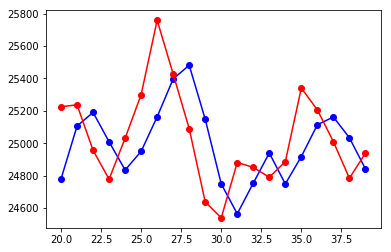

array([25864.604, 25948.281, 25945.988, 26059.227, 26161.854, 26147.488,
       26286.324, 26490.793, 26373.326, 25925.424, 26057.082, 26049.662,
       25254.78 , 23880.457, 24727.387, 25039.67 , 23955.586, 24100.967,
       24509.771, 24647.586, 24779.934, 25106.018, 25190.26 , 25008.666,
       24834.676, 24949.723, 25163.04 , 25396.824, 25481.47 , 25148.322,
       24749.002, 24564.383, 24753.713, 24939.71 , 24748.91 , 24917.8  ,
       25113.662, 25162.129, 25033.908, 24841.748], dtype=float32)

In [10]:
# run trainLSTM
trainLSTM( batchSize=32, timeStep=20, trainBegin=300, trainEnd=1300, data=data)
# run prediction
prediction( timeStep=20, testBegin=1300, trainEnd=1400, data=data)